In [1]:
# !pip install ortools


# Scenario 1


In [8]:
from ortools.sat.python import cp_model
from itertools import combinations

# List of the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Add the Constraints
# Select exactly 3 people
# Ciara must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 3)
model.Add(variables["Ciara"] == 1)
for skill in position_list:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 3 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_positions = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_positions for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) >= 2

# Print unique combinations 
unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()




Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI

Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems



# Scenario 2

In [9]:
from ortools.sat.python import cp_model


# List for the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Constraints: 
# Select exactly 4 people 
# Ciara and Juan must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 4)
model.Add(variables["Ciara"] == 1)
model.Add(variables["Juan"] == 1)
for skill in position_list:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 4 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_position = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_position for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) == 3 and \
           sum("Python" in people_abilities[person] for person in combination) == 2

# Print unique combinations 
unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()



Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems
Peter: Python, AI

Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI
Peter: Python, AI



# Visualisation Scenario 1

In [12]:
!pip install networkx


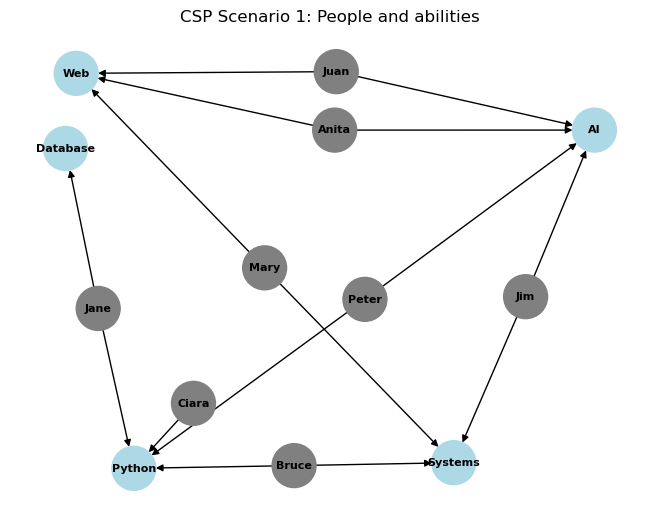

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# List for the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# List desired positions
list_positions = ["Python", "AI", "Web", "Database", "Systems"]

# Create the graph
G = nx.DiGraph()
G.add_nodes_from(people_abilities.keys(), color='grey')  # Set default color for people
for skill in list_positions:
    G.add_node(skill, color='lightblue')
    
for person, skills in people_abilities.items():
    for skill in skills:
        G.add_edge(person, skill)
        
# Set node colors 
node_colors = [G.nodes[node].get('color', 'grey') for node in G.nodes]

# Adjust the positions for Juan and Anita because they have the same abilities
pos = nx.spring_layout(G)
pos["Juan"] = (pos["Juan"][0], pos["Juan"][1] + 0.1)
pos["Anita"] = (pos["Anita"][0], pos["Anita"][1] - 0.1)


# plot the graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color=node_colors, font_size=8)

plt.title("CSP Scenario 1: People and abilities")
plt.show()

Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI

Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems



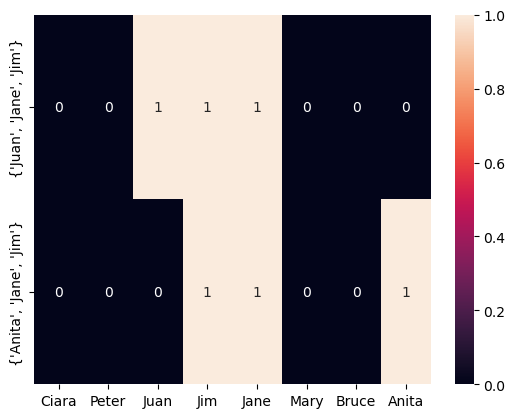

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

from ortools.sat.python import cp_model
from itertools import combinations

# List of the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Add the Constraints
# Select exactly 3 people
# Ciara must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 3)
model.Add(variables["Ciara"] == 1)
for skill in position_list:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 3 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_positions = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_positions for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) >= 2

unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()

# Select the combinations for the heatmap
combinations_for_heatmap = [set(combination) for combination in unique_combinations]

# Create a matrix for the heatmap
heatmap_matrix = [[1 if person in combination else 0 for person in people_abilities.keys()] for combination in combinations_for_heatmap]

# Heatmap
sns.heatmap(heatmap_matrix, annot=True, xticklabels=list(people_abilities.keys()), yticklabels=list(map(str, combinations_for_heatmap)))

plt.show()

# Visualisation Scenario 2

Combination:
Anita: Web, AI
Jane: Python, Database
Jim: AI, Systems
Peter: Python, AI

Combination:
Jane: Python, Database
Jim: AI, Systems
Juan: Web, AI
Peter: Python, AI



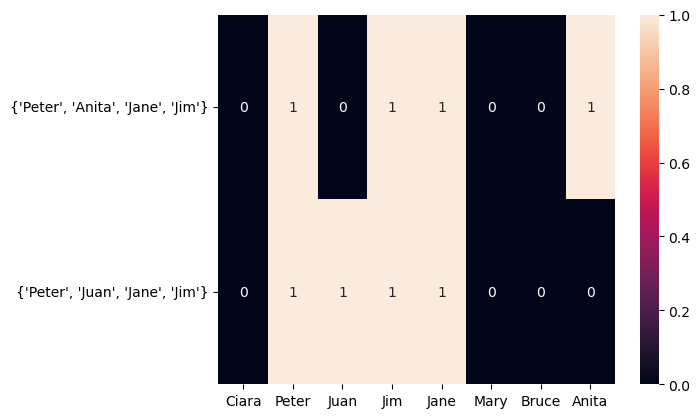

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

from ortools.sat.python import cp_model


# List for the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Constraints: 
# Select exactly 4 people 
# Ciara and Juan must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 4)
model.Add(variables["Ciara"] == 1)
model.Add(variables["Juan"] == 1)
for skill in position_list:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 4 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_position = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_position for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) == 3 and \
           sum("Python" in people_abilities[person] for person in combination) == 2

# Print unique combinations 
unique_combinations = set(map(tuple, backtrack([])))
for combination in unique_combinations:
    print("Combination:")
    for person in combination:
        skills = ', '.join(people_abilities[person])
        print(f"{person}: {skills}")
    print()



# Select the combinations for the heatmap
combinations_for_heatmap = [set(combination) for combination in unique_combinations]

# Create a matrix for the heatmap
heatmap_matrix2 = [[1 if person in combination else 0 for person in people_abilities.keys()] for combination in combinations_for_heatmap]

# Heatmap
sns.heatmap(heatmap_matrix2, annot=True, xticklabels=list(people_abilities.keys()), yticklabels=list(map(str, combinations_for_heatmap)))

plt.show()

# Interactive Visualisations

## Scenario 1

In [31]:
import plotly.express as px
import pandas as pd

# Convert the combinations to a DataFrame
df = pd.DataFrame(heatmap_matrix, columns=people_abilities.keys())

# Create an interactive heatmap 
fig = px.imshow(df, x=list(df.columns), y=list(map(str, combinations_for_heatmap)),
               labels=dict(color="Person"), color_continuous_scale="Viridis")
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(len(df.columns))), ticktext=list(df.columns)),
    yaxis=dict(tickmode='array', tickvals=list(range(len(combinations_for_heatmap))), ticktext=list(map(str, combinations_for_heatmap))),
    width=800, height=600
)

#  plot
fig.show()


## Scenario 2

In [32]:
import plotly.express as px
import pandas as pd
import numpy as np
from ortools.sat.python import cp_model

# List for the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# Create the CP-SAT model
model = cp_model.CpModel()

# Variables: 0 if not selected, 1 if selected
variables = {person: model.NewBoolVar(person) for person in people_abilities}

# Constraints: 
# Select exactly 4 people 
# Ciara and Juan must be selected
# Ensure all skills are covered
model.Add(sum(variables.values()) == 4)
model.Add(variables["Ciara"] == 1)
model.Add(variables["Juan"] == 1)
for skill in position_list:
    model.Add(sum(variables[person] for person, skills in people_abilities.items() if skill in skills) >= 1)

# Backtracking function 
def backtrack(assignment, start_index=0):
    if len(assignment) == 4 and satisfies_constraints(assignment):
        return [sorted(assignment)]  
    else:
        result = []
        for person in variables.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(combination):
    combined_skills_position = [skill for person in combination for skill in people_abilities.get(person, [])]
    return all(skill in combined_skills_position for skill in position_list) and \
           sum("AI" in people_abilities[person] for person in combination) == 3 and \
           sum("Python" in people_abilities[person] for person in combination) == 2

# Print unique combinations 
unique_combinations = set(map(tuple, backtrack([])))

# Create a matrix for the heatmap
heatmap_matrix = np.zeros((len(unique_combinations), len(people_abilities)))

for i, combination in enumerate(unique_combinations):
    for j, person in enumerate(people_abilities):
        if person in combination:
            heatmap_matrix[i, j] = 1

# Convert to a DataFrame
df = pd.DataFrame(heatmap_matrix, columns=people_abilities.keys())

# Create an interactive heatmap
fig = px.imshow(df, x=list(df.columns), y=list(map(str, unique_combinations)),
                labels=dict(color="Person"), color_continuous_scale="Viridis")

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(len(df.columns))), ticktext=list(df.columns)),
    yaxis=dict(tickmode='array', tickvals=list(range(len(unique_combinations))), ticktext=list(map(str, unique_combinations))),
    width=800, height=600
)

# plot
fig.show()


# GUI

In [44]:
import tkinter as tk
from tkinter import ttk

# List of the people and abilities
people_abilities = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# positions needed
position_list = ["Python", "AI", "Web", "Database", "Systems"]

# valid combinations scenario 1
comb1 = ["Jane", "Jim", "Juan"]
comb2 = ["Anita", "Jane", "Jim"]

# valid combinations scenario 2
comb3 = ["Anita", "Jane", "Jim", "Peter"]
comb4 = ["Jane", "Jim", "Juan", "Peter"]

def combinations():
    selected = [person for person, var in zip(people_abilities.keys(), person_vars) if var.get()]
    # Condition to check the combinations chosen
    if set(selected) == set(comb1):
        result_label.config(text="Match Combination #1 - Scenario 1")
    elif set(selected) == set(comb2):
        result_label.config(text="Match Combination #2 - Scenario 1")
    elif set(selected) == set(comb3):
        result_label.config(text="Match Combination #1 - Scenario 2")
    elif set(selected) == set(comb4):
        result_label.config(text="Match Combination #2 - Scenario 2")
    else:
        result_label.config(text="No Match, try it again!")
        
        

def restart():
    result_label.config(text="")
    for var in person_vars:
        var.set(False)

# GUI 
root = tk.Tk()
root.title("Combination Checker")

# size of the window
root.geometry("500x350")



# Display the names
for i, (person, abilities) in enumerate(people_abilities.items()):
    abilities_str = ", ".join(abilities)
    label_text = f"{person}: {abilities_str}"
    ttk.Label(root, text=label_text).grid(row=i, column=0, sticky=tk.W)

# Checkboxes to select people
style = ttk.Style()
style.configure("TCheckbutton")
person_vars = [tk.BooleanVar() for _ in people_abilities]
for i, var in enumerate(person_vars):
    ttk.Checkbutton(root, text="", variable=var, style="TCheckbutton").grid(row=i, column=1, sticky=tk.W)

# Buttons side by side
check_button = ttk.Button(root, text="Check", command=combinations)
check_button.grid(row=len(people_abilities), column=0, pady=5, padx=5, sticky=tk.W)

restart_button = ttk.Button(root, text="Restart", command=restart)
restart_button.grid(row=len(people_abilities), column=1, pady=5, padx=5, sticky=tk.W)

exit_button = ttk.Button(root, text="Exit", command=root.destroy)
exit_button.grid(row=len(people_abilities) + 1, column=0, columnspan=2, pady=10)

#label
result_label = ttk.Label(root, text="", background="white")
result_label.grid(row=len(people_abilities) + 2, column=0, columnspan=2, pady=5)

root.mainloop()
